# IMPORT LIABRARIES

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# IMPORT DATASETS

In [2]:
df_alexa= pd.read_csv('amazon_alexa.tsv',sep='\t')

# SUMMARIZE DATASET

In [3]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


# DATA CLEANING

In [4]:
df_alexa = df_alexa.drop(['date','rating'], axis=1)

In [5]:
df_alexa

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [6]:
variation_dummies= pd.get_dummies(df_alexa['variation'], drop_first=True)

In [7]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [8]:
df_alexa.drop(['variation'],axis=1, inplace=True)

In [9]:
df_alexa

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


In [10]:
df_alexa= pd.concat([df_alexa,variation_dummies],axis=1)

In [11]:
df_alexa

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# COUNT VECTORIZER (TOKENIZATION)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer= CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(df_alexa['verified_reviews'])

In [13]:
alexa_countvectorizer

<3150x4044 sparse matrix of type '<class 'numpy.int64'>'
	with 60852 stored elements in Compressed Sparse Row format>

In [14]:
alexa_countvectorizer.shape

(3150, 4044)

In [15]:
# Converting alexa_countvectorization to dataframe to concat with original dataframe

reviews = pd.DataFrame(alexa_countvectorizer.toarray())

In [16]:
df_alexa.drop(['verified_reviews'], axis=1, inplace=True)

In [17]:
df_alexa

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [18]:
# concat review and alexa dataframe

df_alexa= pd.concat([df_alexa,reviews],axis=1)
df_alexa.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train Test Split

In [19]:
x= df_alexa.drop(['feedback'],axis=1)
x

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
y= df_alexa['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=20, random_state=5)

# BUILD AND TRAIN THE MODEL

In [22]:
classifier= tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(4059,)))

classifier.add(tf.keras.layers.Dense(units=100, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [23]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               406000    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 416,201
Trainable params: 416,201
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
epochs_hist= classifier.fit(x_train, y_train, epochs=10)

Epoch 1/10
98/98 [==============================] - 1s 4ms/step - loss: 0.2996 - accuracy: 0.9173
Epoch 2/10
98/98 [==============================] - 0s 3ms/step - loss: 0.1115 - accuracy: 0.9524
Epoch 3/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9853
Epoch 4/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9923
Epoch 5/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9936
Epoch 6/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9946
Epoch 7/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9946
Epoch 8/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9933
Epoch 9/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9942
Epoch 10/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9946


# VISUALIZE

Text(0, 0.5, 'training loss')

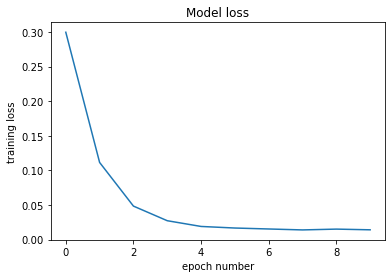

In [26]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('epoch number')
plt.ylabel('training loss')

Text(0, 0.5, 'score')

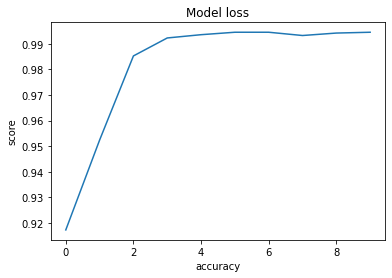

In [27]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model loss')
plt.xlabel('accuracy')
plt.ylabel('score')

# EVALUATING THE MODEL

In [33]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred

1/1 [==============================] - 0s 20ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [34]:
y_test

2951    1
2991    1
2952    1
1641    1
2251    1
1556    1
2517    1
2135    1
2821    1
1753    1
1563    0
2772    1
1354    1
2265    1
2771    1
1002    1
2355    1
1670    1
467     1
720     1
Name: feedback, dtype: int64

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion matrix = ", confusion_matrix(y_test, y_pred))

print("accuracy scpre = ", accuracy_score(y_test, y_pred))

Confusion matrix =  [[ 0  1]
 [ 0 19]]
accuracy scpre =  0.95
